### Student Information
Name: Angelica Cassandra Loria

Student ID: 110065431

GitHub ID: acmloria

Kaggle name: angelicacassandra or https://www.kaggle.com/emityrevesehsulb

Kaggle private scoreboard snapshot:

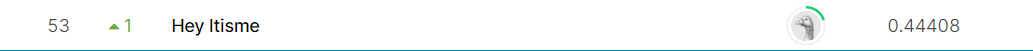
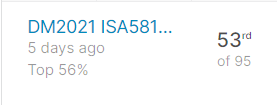
[Snapshot]
[Snapshot]

For my kaggle entry: Please see <a href="https://colab.research.google.com/drive/1mVGkK_s4TQTPHAY1XG2sptQ5RA3nzKRL?usp=sharing" target="_blank">110065431_tweet_classification</a>



### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

<h1> Data Preparation </h1>

In [2]:
# Load data

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head(10)


,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


In [3]:

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

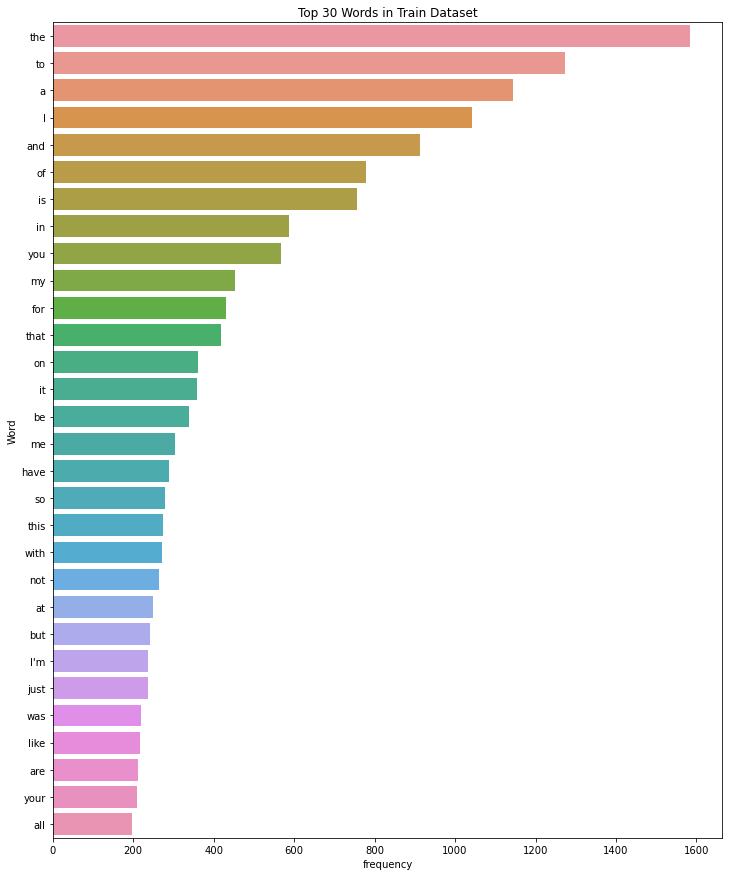

In [4]:
# Answer here
# Note: instructions did not say to clean the data (i.e. remove stopwords) so this is top 30 words pre-cleaning
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

# TRAIN DF

# put all words into one list
words = ' '.join([word for word in train_df['text']]).split()

# use nltk to get frequency distribution of words
freq_dist = nltk.FreqDist(words) 

# convert to dataframe
wordcounts = pd.DataFrame({'word':list(freq_dist.keys()), 'frequency':list(freq_dist.values())}) 
  
# select top 30 most frequent words
top30 = wordcounts.nlargest(columns="frequency", n = 30) 
  
# plot
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=top30, x= "frequency", y = "word")
ax.set(ylabel = 'Word') 
ax.set_title("Top 30 Words in Train Dataset") 
plt.show()

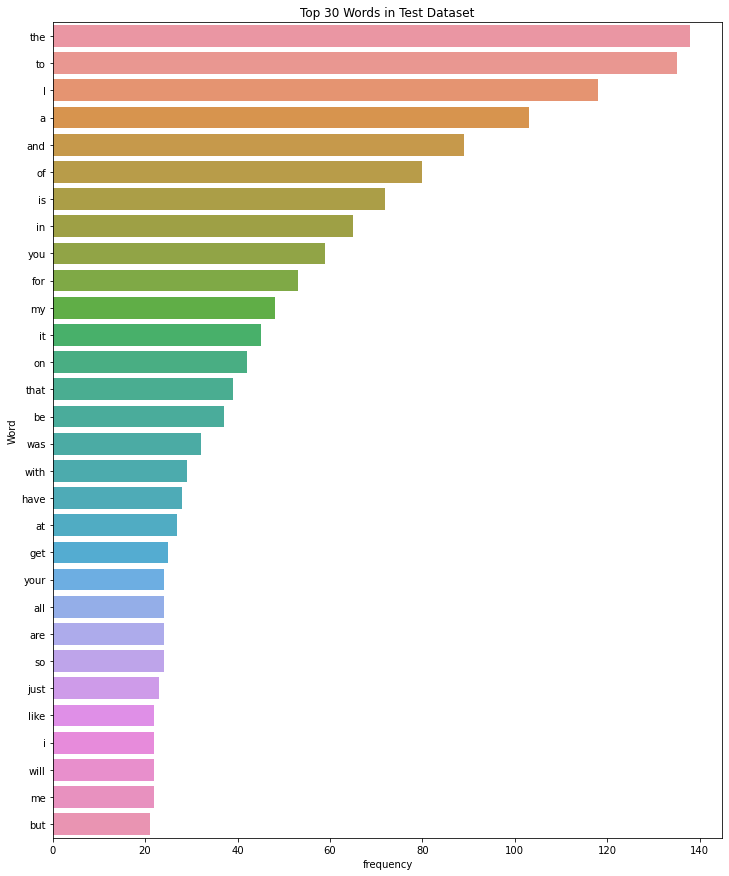

In [5]:
# TEST DF

# put all words into one list
test_words = ' '.join([word for word in test_df['text']]).split()

# use nltk to get frequency distribution of words
test_freq_dist = nltk.FreqDist(test_words) 

# convert to dataframe
test_wordcounts = pd.DataFrame({'word':list(test_freq_dist.keys()), 'frequency':list(test_freq_dist.values())}) 
  
# select top 30 most frequent words
test_top30 = test_wordcounts.nlargest(columns="frequency", n = 30) 
  
# plot
plt.figure(figsize=(12,15)) 
test_ax = sns.barplot(data=test_top30, x= "frequency", y = "word")
test_ax.set(ylabel = 'Word') 
test_ax.set_title("Top 30 Words in Test Dataset") 
plt.show()

In [6]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [7]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [6]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

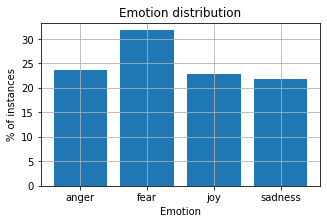

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [10]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [11]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [13]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

C:\Users\AC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [14]:
"😂" in feature_names

False

In [15]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\AC\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [16]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [17]:
"😂" in feature_names_500

True

<h1> Feature Engineering </h1>

### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzer (TFIDF)
# get 1000 words that are less sparse/better representatives
vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# 1. Learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_tfidf_feat = vectorizer.transform(train_df['text'])

# show features 100:110
feat_names = vectorizer.get_feature_names()
feat_names[100:110]

['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']

<h1> Model </h1>

In [19]:
# run decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])


# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## taking a look at data dimensions is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [20]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'anger', 'sadness', 'sadness', 'fear',
       'sadness', 'fear', 'fear', 'joy'], dtype=object)

In [21]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [22]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [23]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [24]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

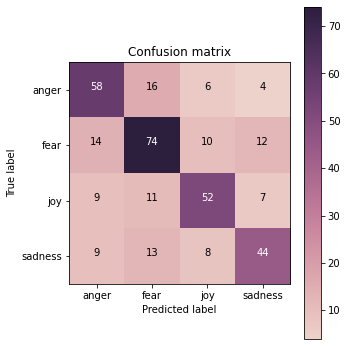

In [25]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

# diagonal values: are the ones we predict correctly. everything else around it is mis classified
# out of the total XX squares, 70 cases of fear were predicted correctly

### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

<i> Note: I modified the confusion matrix above a bit by switching the X and Y axis (X axis label should be predicted label why Y axis label should be true label), this is more in line with the correct values if you compare y_test and y_test_pred. </i>

Precision = (TP) / (TP+FP) <br>
Recall = (TP) / (TP+FN)<br>
F measure = (2 * TP) / (2TP + FP + FN)<br>
<br>
TP = True Positive <br>
FP = False Positive (Used in precision, e.g for those labelled as "yes" but actual value is "no") <br>
FN = False Negative (Used in recall e.g. for those labelled as "no" but actual value is "yes") <br>
<br>
For example, to get the precision of anger, we know that we have 58 true positives (labelled as anger, are actually anger) and 15+5+9 = 29 false positives (labelled as anger, are actually other emotions). This gives us 58 / (58+29) = 65%.
<br>

**ANGER** <br>
Precision and recall are both 65%. For recall, out of all the tags identified as anger, 65% are true positives while the other 35% are mislabelled as either fear, joy, or sadness. For precision, 65% are true positives while the other 35% are actually fear, joy, or sadness but are labelled as anger. If we deep dive into this 35%, we can see that most are mislabelled as anger. This can mean that the classifier has hard time differentiating between anger and fear.

**FEAR** <br>
Fear has precision of 62%. We can see that false positives are distributed evenly over the three other labels while for recall (64%) most false negatives are predicted as either anger or sadness. Since recall is slightly better, this means that the classifier is slightly better at identifying percentage of total relevant results than percentage of results that are relevant.  

**JOY** <br>
With a precision of 67% for joy, most false positives are fear. For precision, false negatives are distributed evenly over the three labels. Joy has the highest precision and recall, however note that in the dataset it also has less entries (compared to fear, for example, which has 110 entries in the dataset).

**SADNESS** <br>
With a precision of 61%, most false positives are fear. With a recall of 57%, most false negatives are also fear. Sadness has the greatest difference between precision and recall. Since it has a better precision, this means it is better at identifying the percentage of results that are relevant than the percentage of total relevant results.

Overall, the classifier has an accuracy of 64% - a good number but it seems to be mislabelling many emotions that are not fear as fear. One of the reasons could be the class imbalance, fear has the most number of records at 110 while the other 3 emotions only have around 75-85 records.


### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [26]:
from sklearn.naive_bayes import MultinomialNB

mnmodel = MultinomialNB()
mnmodel = mnmodel.fit(X_train, y_train)

mn_y_test_pred = mnmodel.predict(X_test)

mn_y_test_pred[:10]

array(['anger', 'sadness', 'anger', 'sadness', 'fear', 'fear', 'anger',
       'fear', 'joy', 'joy'], dtype='<U7')

In [27]:
# results evaluation
print(classification_report(y_true=y_test, y_pred=mn_y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



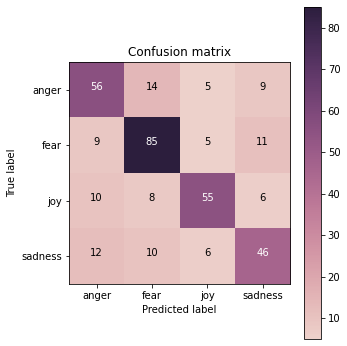

In [28]:
# plot confusion matrix
mn_cm = confusion_matrix(y_true=y_test, y_pred=mn_y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(mn_cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Overall, Naive Bayes has equal or better precision/recall than the Decision Tree, and has an overall better accuracy of 72%. And, it is able to classify fear better.

An extension to bagging which uses de-correlated trees and creates bootstrap samples from the training data, RandomForests take the majority vote. One of the advantages includes that it helps you avoid overfitting. For disadvantage, it can be quite large and become computationally complex. Naive Bayes is a probabilistic framework for solving classification problems based on the Bayes Theorem. Pros include ease of implementation and good results obtained in most cases, while cons include assumptions of class conditional independence (in the real world, dependencies exist).

In text classification, however, Naive Bayes works better and is often used because it treats each feature (i.e. each word) independently so it will not suffer from the curse of dimensionality. On the other hand, the ensemble method RandomForest will become large and will need pruning, which is not good for text classification problems which have a lot of dimensional and sparse textual data.

<h1> Deep Learning </h1>

In [31]:
# build NN
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)



X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1480     fear
257     anger
2708      joy
243     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [33]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [34]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax
# https://stackoverflow.com/questions/56986100/module-tensorflow-has-no-attribute-get-default-graph-i-dont-want-any-grap

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

In [35]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# convert to array to circumvent data adapter error?

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

# sometimes model plateaus
# accuracy low at the start then increases

Epoch 1/25


C:\Users\AC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 2ms/step - loss: 1.3191 - accuracy: 0.3836 - val_loss: 1.2561 - val_accuracy: 0.4611
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9819 - accuracy: 0.6479 - val_loss: 0.8920 - val_accuracy: 0.6859
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7968 - val_loss: 0.7681 - val_accuracy: 0.7118
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8464 - val_loss: 0.8021 - val_accuracy: 0.6888
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8768 - val_loss: 0.7973 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.9092 - val_loss: 0.8494 - val_accuracy: 0.6974
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9206 - val_loss: 0.9012 - val_accuracy: 0.6859
Epoch 8/25
113/11

In [36]:
# predict on testing data
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

# first line in array -> is the prediction (so joy in this exmaple), second fear etc

array([[7.1886188e-07, 9.9947733e-01, 7.6547556e-05, 4.4543849e-04],
       [9.9876738e-01, 5.7780573e-05, 1.2550629e-06, 1.1735803e-03],
       [1.8874383e-06, 4.7694071e-09, 9.9999738e-01, 7.0867355e-07],
       [9.8562717e-01, 3.8737676e-06, 7.7247154e-05, 1.4291707e-02],
       [1.2557594e-05, 9.9639964e-01, 3.2605988e-03, 3.2720729e-04]],
      dtype=float32)

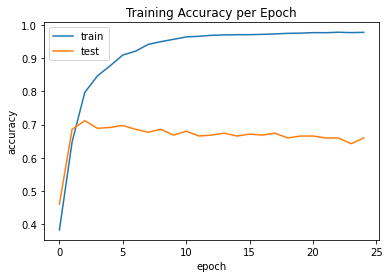

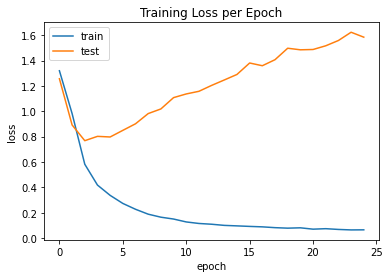

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Training Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training Loss per Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

The above graphs show that the model is overfitting. Overfitting is when training error is small but test error is large. We can see in the loss graph that for train, loss decreases over the number of epochs but for the test set it actually increases, meaning it is not generalizing well enough. Accuracy continuously increases and is generally maintained near 100% for trainset, however for test set accuracy stops improving already before the 5th epoch and just stays stagnant at a lower value.

<h1> Word Vectors </h1>

In [38]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

C:\Users\AC\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


,id,text,text_tokenized
1480,20623,broken policy' #blasio &lt;&gt; #trump #giulia...,"[broken, policy, ', #, blasio, &, lt, ;, &, gt..."
257,10257,OOOOOOOOH MY GOD UUUUGGGGHHHHHHHHH #rage,"[OOOOOOOOH, MY, GOD, UUUUGGGGHHHHHHHHH, #, rage]"
2708,30704,The bounty hunter things a bit lively,"[The, bounty, hunter, things, a, bit, lively]"
243,10243,@TheOneSoleShoe that is one thing but attackin...,"[@, TheOneSoleShoe, that, is, one, thing, but,..."
1657,20800,"Texans played horrible. Bad play calling, bad...","[Texans, played, horrible, ., Bad, play, calli..."


In [39]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['broken', 'policy', "'", '#', 'blasio', '&', 'lt', ';', '&', 'gt', ';', '#', 'trump', '#', 'giuliani', "'broken", 'windows', "'", 'all', 'part', 'of', "'pecking", 'order', "'", '#', 'bully', 'politics', '#', 'america', 'RESIST', '#', 'motto']),
       list(['OOOOOOOOH', 'MY', 'GOD', 'UUUUGGGGHHHHHHHHH', '#', 'rage']),
       list(['The', 'bounty', 'hunter', 'things', 'a', 'bit', 'lively'])],
      dtype=object)

In [40]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1480,20623,broken policy' #blasio &lt;&gt; #trump #giulia...,"[broken, policy, ', #, blasio, &, lt, ;, &, gt..."
257,10257,OOOOOOOOH MY GOD UUUUGGGGHHHHHHHHH #rage,"[OOOOOOOOH, MY, GOD, UUUUGGGGHHHHHHHHH, #, rage]"
2708,30704,The bounty hunter things a bit lively,"[The, bounty, hunter, things, a, bit, lively]"
243,10243,@TheOneSoleShoe that is one thing but attackin...,"[@, TheOneSoleShoe, that, is, one, thing, but,..."
1657,20800,"Texans played horrible. Bad play calling, bad...","[Texans, played, horrible, ., Bad, play, calli..."


In [47]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

In [42]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [43]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

In [44]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

We can use functions like sentence2vec or doc2vec, which generate the word vector representations for sentences/documents respectively. It utilizes an additional vector that is document unique and can acts as "as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document." 

We can also get the average or sum of word vectors to represent sentence data.

Sources:
https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e
https://cs.stanford.edu/~quocle/paragraph_vector.pdf

<h1> Clustering </h1>

In [48]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [49]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [50]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [51]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [52]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


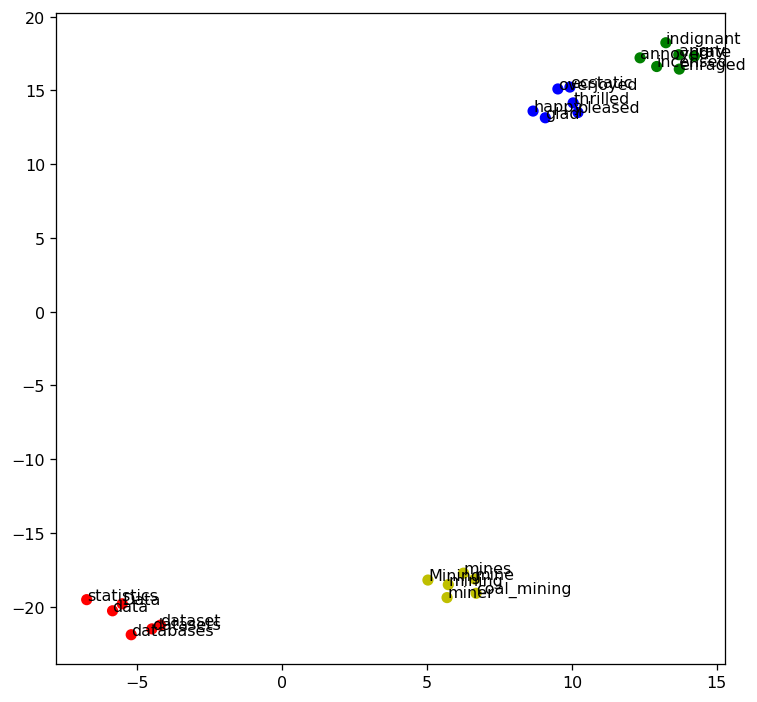

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [55]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

## create the training corpus
training_corpus = train_df['text_tokenized'].values

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

from gensim.models import Word2Vec

## setting

# vector_dim = how many dimensions we want our word embeddings to be represented by? creates vector of 100 dimensions that represent one word and can be plotted in vector space
vector_dim = 100

window_size = 5
min_count = 1
training_iter = 20

## model
# WORD2VEC NEEDS SENTENCES TO BE TRAINED, BECAUSE WORD2VEC USES CONTEXT
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

2021-12-07 01:14:00,145 : INFO : collecting all words and their counts
2021-12-07 01:14:00,147 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-07 01:14:00,160 : INFO : collected 11885 word types from a corpus of 72463 raw words and 3613 sentences
2021-12-07 01:14:00,161 : INFO : Creating a fresh vocabulary
2021-12-07 01:14:00,222 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11885 unique words (100.0%% of original 11885, drops 0)', 'datetime': '2021-12-07T01:14:00.222633', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-12-07 01:14:00,223 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72463 word corpus (100.0%% of original 72463, drops 0)', 'datetime': '2021-12-07T01:14:00.223674', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 

2021-12-07 01:14:01,394 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-12-07 01:14:01,395 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-12-07 01:14:01,396 : INFO : EPOCH - 15 : training on 72463 raw words (55228 effective words) took 0.1s, 1051888 effective words/s
2021-12-07 01:14:01,450 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-12-07 01:14:01,451 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-12-07 01:14:01,457 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-12-07 01:14:01,458 : INFO : EPOCH - 16 : training on 72463 raw words (55302 effective words) took 0.1s, 986213 effective words/s
2021-12-07 01:14:01,508 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-12-07 01:14:01,511 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-12-07 01:14:01,521 : INFO : worker thread finished; awaiting finish of 0 more threads
202

In [56]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15

happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        


print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

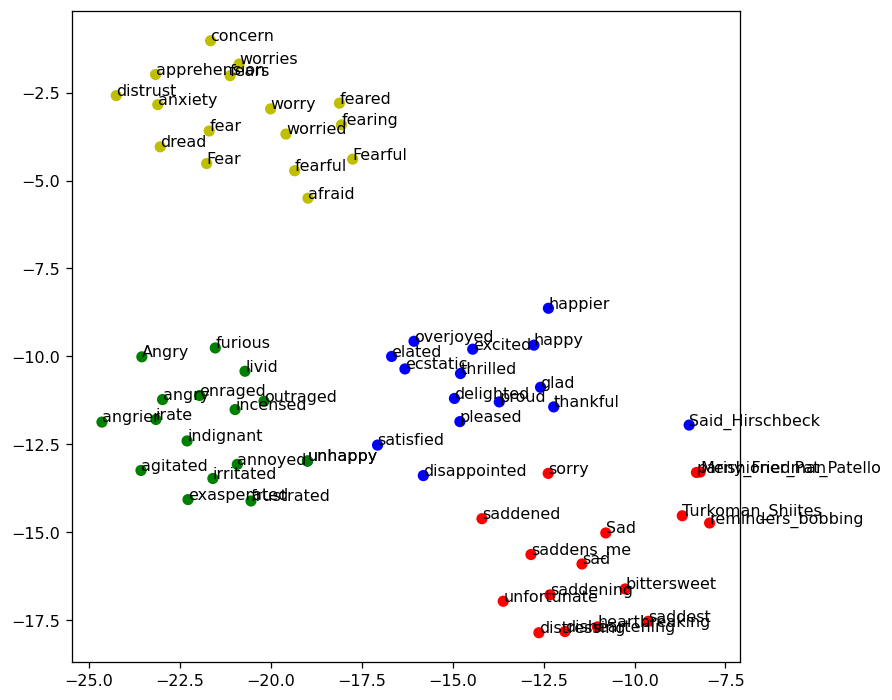

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


### Kaggle:

For my kaggle entry: Please see <a href="https://colab.research.google.com/drive/1mVGkK_s4TQTPHAY1XG2sptQ5RA3nzKRL?usp=sharing" target="_blank">110065431_tweet_classification</a>
